In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
np.random.choice([0,1,2,3,4,5], 8, replace=True)

array([5, 1, 1, 1, 2, 2, 5, 2])

In [2]:
os.listdir()

['all_data_comparisons.ipynb',
 '.DS_Store',
 'figs',
 'prediction_analyses.ipynb',
 'grid_search_results.csv',
 'grid_search_analysis.ipynb',
 'grid_search.ipynb',
 'n_features_info.csv',
 'models',
 '__pycache__',
 'README.md',
 'example.ipynb',
 '.ipynb_checkpoints',
 'starting_code',
 'example_all.ipynb',
 'data',
 'flu_matrix_completion.py']

In [3]:
df = pd.read_csv('n_features_info.csv')
df['Source Table'] = [i.split(" ")[1][:-1] for i in df.n_features_info]
df['Target Table'] = [i.split(" ")[3][:-1] for i in df.n_features_info]
df['Overlapping Virus Count'] = [int(i.split(" ")[-1]) for i in df.n_features_info]
df = df.drop(['Unnamed: 0', 'n_features_info', 'Source Table'], axis=1).set_index("Target Table")

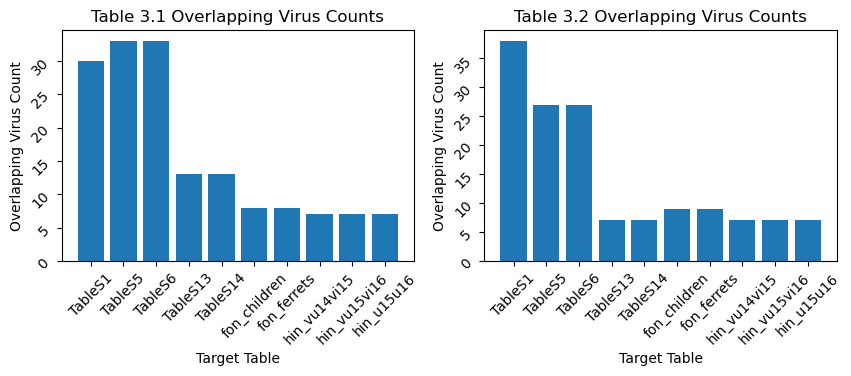

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,3))

axs[0].set_title("Table 3.1 Overlapping Virus Counts")
axs[0].set_xlabel("Target Table")
axs[0].set_ylabel("Overlapping Virus Count")
axs[0].bar(df.index[10:], df['Overlapping Virus Count'][10:])
axs[0].tick_params(labelrotation=45)

axs[1].set_title("Table 3.2 Overlapping Virus Counts")
axs[1].set_xlabel("Target Table")
axs[1].set_ylabel("Overlapping Virus Count")
axs[1].bar(df.index[:10], df['Overlapping Virus Count'][:10])
axs[1].tick_params(labelrotation=45)


In [13]:
n_features_info_df.n_features_info

Unnamed: 0
0     sourceID: TableS3.2, groupID: TableS1, number ...
1     sourceID: TableS3.2, groupID: TableS5, number ...
2     sourceID: TableS3.2, groupID: TableS6, number ...
3     sourceID: TableS3.2, groupID: TableS13, number...
4     sourceID: TableS3.2, groupID: TableS14, number...
5     sourceID: TableS3.2, groupID: fon_children, nu...
6     sourceID: TableS3.2, groupID: fon_ferrets, num...
7     sourceID: TableS3.2, groupID: hin_vu14vi15, nu...
8     sourceID: TableS3.2, groupID: hin_vu15vi16, nu...
9     sourceID: TableS3.2, groupID: hin_u15u16, numb...
10    sourceID: TableS3.1, groupID: TableS1, number ...
11    sourceID: TableS3.1, groupID: TableS5, number ...
12    sourceID: TableS3.1, groupID: TableS6, number ...
13    sourceID: TableS3.1, groupID: TableS13, number...
14    sourceID: TableS3.1, groupID: TableS14, number...
15    sourceID: TableS3.1, groupID: fon_children, nu...
16    sourceID: TableS3.1, groupID: fon_ferrets, num...
17    sourceID: TableS3.1, groupID: h

In [15]:
# Contains a list of grid analysis entries and their corresponding RMSEs
# The grid analysis done on the matrix completion model tested permutations of the hyperparameters available in the mode
# such as feature number, number of total trees to train, and the number of best trees to use for prediction
grid_search_df = pd.read_csv("grid_search_results.csv").set_index("full_comparison_name").drop(["Unnamed: 0"], axis=1)
# n_features_info_df contains information on the number of overlapping viruses between each comparison (source and target table pair tested in grid analysis) 
n_features_info_df = pd.read_csv('n_features_info.csv').set_index('Unnamed: 0')
comparisons = []
for i in n_features_info_df.n_features_info:
    _, source, _, target, _, _, _, _, _ = i.split(' ') # Extract relevant information (source and target table names from entry)
    comparison_name = f"{source[:-1]}_to_{target[:-1]}" # Create a name for the comparison which can be used for identifying subsets of grid_search_df
    comparisons.append(comparison_name)
# grid_per_comparison is a dict containing all the grid search entries corresponding to a comparison (entries will be permutations of hyperparameter settings)
grid_per_comparison = {comparison: [i for i in grid_search_df.index if comparison in i] for comparison in comparisons}

# The following code creates a dataframe that can be used to plot the grid analysis for each comparison
grid_heatmap_per_comparison = dict()
for comparison in comparisons:
    grid_indices = grid_per_comparison[comparison]
    grid_heatmap_df = pd.DataFrame() # Heatmap of grid analysis results for a comparison (source and target table pair)
    for idx in grid_indices: # Iterate over each entry name from the grid search dataframe
        if "fon" in idx or "hin" in idx:
            source, _, target_p1, target_p2, _, _, n_features, _, _, train_trees, _, _, best_trees = idx.split('_') 
            
        else:
            source, _, target, _, _, n_features, _, _, train_trees, _, _, best_trees = idx.split('_') # Extract relevant fields from entry name
        RMSE = grid_search_df.loc[idx, 'RMSE'] # Access the recorded RMSE of the grid analysis entry
        grid_heatmap_df.loc[f'n_features_{n_features}',f'train_trees_{train_trees}_best_trees_{best_trees}'] = RMSE # Save the grid search information to a dataframe that can be plotted as a heatmap
    grid_heatmap_per_comparison[comparison] = grid_heatmap_df
    

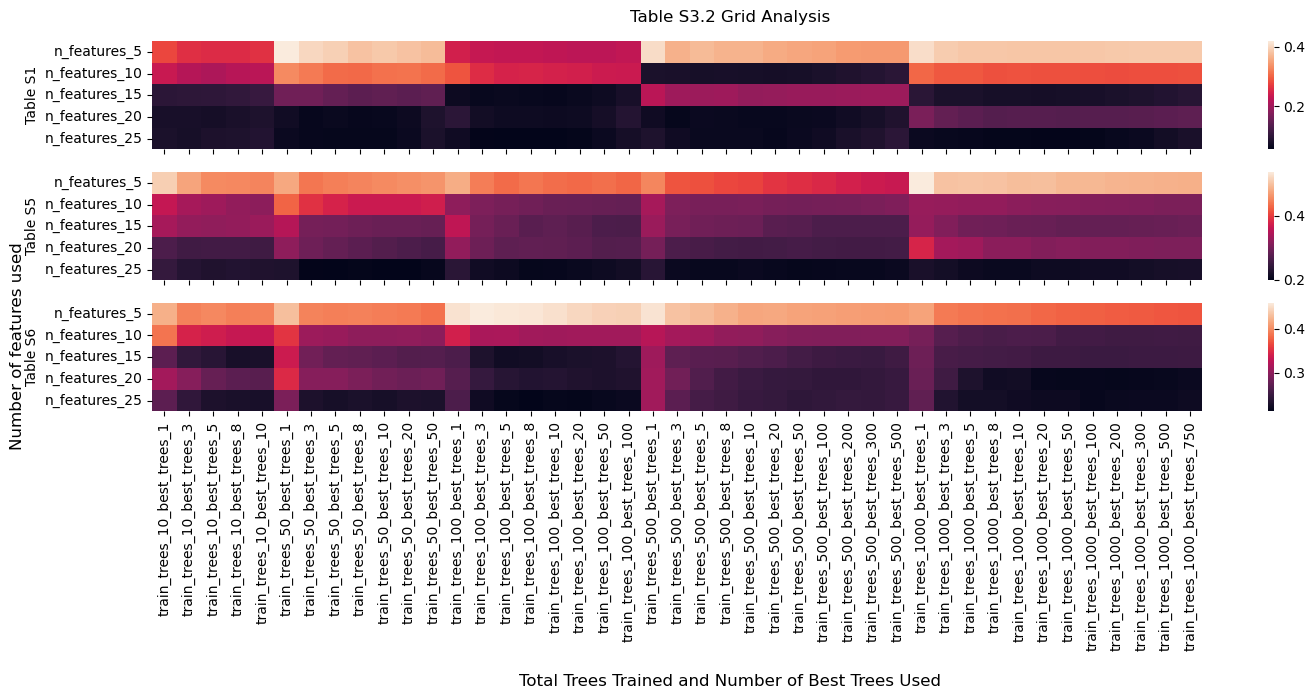

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,7))


sns.heatmap(grid_heatmap_per_comparison['TableS3.2_to_TableS1'], ax=axs[0])

sns.heatmap(grid_heatmap_per_comparison['TableS3.2_to_TableS5'], ax=axs[1])

sns.heatmap(grid_heatmap_per_comparison['TableS3.2_to_TableS6'], ax=axs[2])



axs[0].set_xticklabels("")
axs[1].set_xticklabels("")

axs[0].set_ylabel("Table S1")
axs[1].set_ylabel("Table S5")
axs[2].set_ylabel("Table S6")


fig.suptitle("Table S3.2 Grid Analysis")
fig.supxlabel("Total Trees Trained and Number of Best Trees Used")
fig.supylabel("Number of features used")
plt.tight_layout()
plt.show()

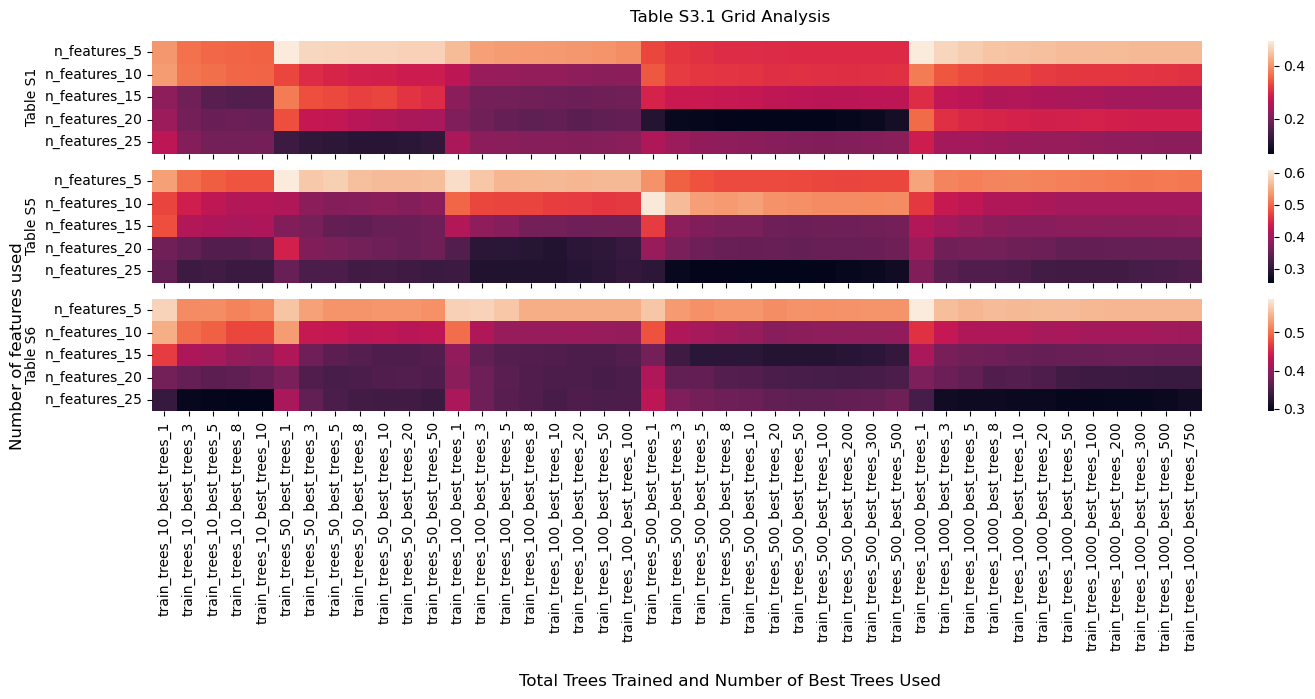

In [182]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,7))


sns.heatmap(grid_heatmap_per_comparison['TableS3.1_to_TableS1'], ax=axs[0])

sns.heatmap(grid_heatmap_per_comparison['TableS3.1_to_TableS5'], ax=axs[1])

sns.heatmap(grid_heatmap_per_comparison['TableS3.1_to_TableS6'], ax=axs[2])


axs[0].set_xticklabels("")
axs[1].set_xticklabels("")


axs[0].set_ylabel("Table S1")
axs[1].set_ylabel("Table S5")
axs[2].set_ylabel("Table S6")


fig.suptitle("Table S3.1 Grid Analysis")
fig.supxlabel("Total Trees Trained and Number of Best Trees Used")
fig.supylabel("Number of features used")
plt.tight_layout()
plt.show()

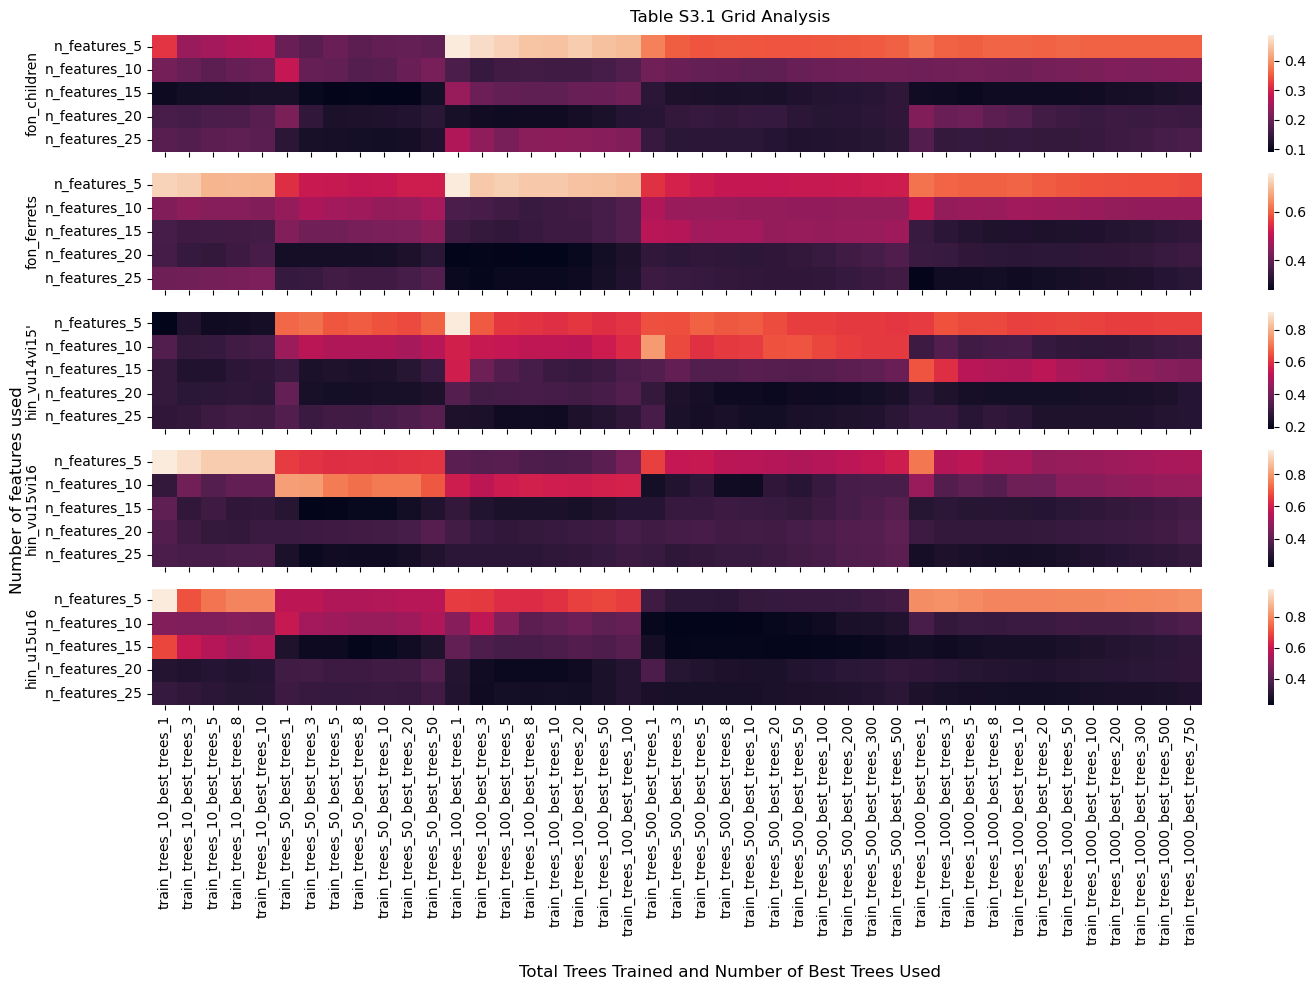

In [100]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15,10))


sns.heatmap(grid_heatmap_per_comparison['TableS3.1_to_fon_children'], ax=axs[0])

sns.heatmap(grid_heatmap_per_comparison['TableS3.1_to_fon_ferrets'], ax=axs[1])

sns.heatmap(grid_heatmap_per_comparison['TableS3.1_to_hin_vu14vi15'], ax=axs[2])

sns.heatmap(grid_heatmap_per_comparison['TableS3.1_to_hin_vu15vi16'], ax=axs[3])

sns.heatmap(grid_heatmap_per_comparison['TableS3.1_to_hin_u15u16'], ax=axs[4])

axs[0].set_xticklabels("")
axs[1].set_xticklabels("")
axs[2].set_xticklabels("")
axs[3].set_xticklabels("")

axs[0].set_ylabel("fon_children")
axs[1].set_ylabel("fon_ferrets")
axs[2].set_ylabel("hin_vu14vi15'")
axs[3].set_ylabel("hin_vu15vi16")
axs[4].set_ylabel("hin_u15u16")

fig.suptitle("Table S3.1 Grid Analysis")
fig.supxlabel("Total Trees Trained and Number of Best Trees Used")
fig.supylabel("Number of features used")
plt.tight_layout()
plt.show()

## Secondary Grid Search: Adjusted n_feature values for tables with lower number of viable features to train on

In [148]:
# Contains a list of grid analysis entries and their corresponding RMSEs
# The grid analysis done on the matrix completion model tested permutations of the hyperparameters available in the mode
# such as feature number, number of total trees to train, and the number of best trees to use for prediction
grid_search_secondary_df = pd.read_csv("grid_search_results_secondary.csv").set_index("full_comparison_name").drop(["Unnamed: 0"], axis=1)
# n_features_info_df contains information on the number of overlapping viruses between each comparison (source and target table pair tested in grid analysis) 
n_features_info_secondary_df = pd.read_csv('n_features_info_secondary.csv').set_index('Unnamed: 0')
comparisons_secondary = []
for i in n_features_info:
    _, source, _, target, _, _, _, _, _ = i.split(' ') # Extract relevant information (source and target table names from entry)
    comparison_name = f"{source[:-1]}_to_{target[:-1]}" # Create a name for the comparison which can be used for identifying subsets of grid_search_secondary_df
    comparisons_secondary.append(comparison_name)
# grid_per_comparison_secondary is a dict containing all the grid search entries corresponding to a comparison (entries will be permutations of hyperparameter settings)
grid_per_comparison_secondary = {comparison: [i for i in grid_search_secondary_df.index if comparison in i] for comparison in comparisons_secondary}

# The following code creates a dataframe that can be used to plot the grid analysis for each comparison
grid_heatmap_per_comparison_secondary = dict()
for comparison in comparisons_secondary:
    grid_indices = grid_per_comparison_secondary[comparison]
    grid_heatmap_df = pd.DataFrame() # Heatmap of grid analysis results for a comparison (source and target table pair)
    for idx in grid_indices: # Iterate over each entry name from the grid search dataframe
        if "fon" in idx or "hin" in idx:
            source, _, target_p1, target_p2, _, _, n_features, _, _, train_trees, _, _, best_trees = idx.split('_') 
            
        else:
            source, _, target, _, _, n_features, _, _, train_trees, _, _, best_trees = idx.split('_') # Extract relevant fields from entry name
        RMSE = grid_search_secondary_df.loc[idx, 'RMSE'] # Access the recorded RMSE of the grid analysis entry
        grid_heatmap_df.loc[f'n_features_{n_features}',f'train_trees_{train_trees}_best_trees_{best_trees}'] = RMSE # Save the grid search information to a dataframe that can be plotted as a heatmap
    grid_heatmap_per_comparison_secondary[comparison] = grid_heatmap_df
    

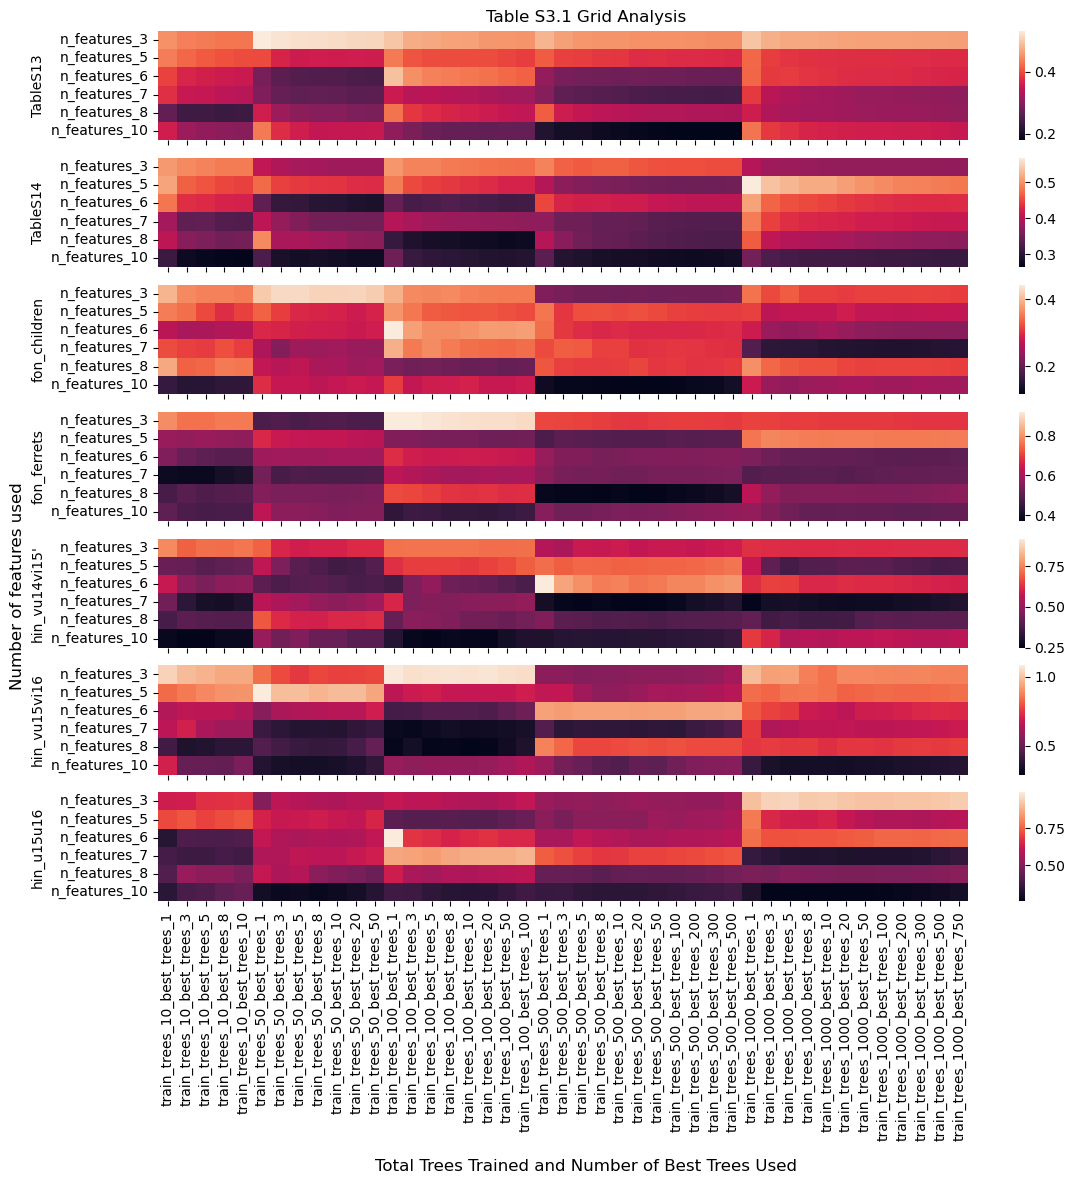

In [177]:
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(12,12))

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.1_to_TableS13'], ax=axs[0])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.1_to_TableS14'], ax=axs[1])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.1_to_fon_children'], ax=axs[2])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.1_to_fon_ferrets'], ax=axs[3])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.1_to_hin_vu14vi15'], ax=axs[4])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.1_to_hin_vu15vi16'], ax=axs[5])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.1_to_hin_u15u16'], ax=axs[6])

axs[0].set_xticklabels("")
axs[1].set_xticklabels("")
axs[2].set_xticklabels("")
axs[3].set_xticklabels("")
axs[4].set_xticklabels("")
axs[5].set_xticklabels("")

axs[0].set_ylabel("TableS13")
axs[1].set_ylabel("TableS14")
axs[2].set_ylabel("fon_children")
axs[3].set_ylabel("fon_ferrets")
axs[4].set_ylabel("hin_vu14vi15'")
axs[5].set_ylabel("hin_vu15vi16")
axs[6].set_ylabel("hin_u15u16")

fig.suptitle("Table S3.1 Grid Analysis")
fig.supxlabel("Total Trees Trained and Number of Best Trees Used")
fig.supylabel("Number of features used")
plt.tight_layout()
plt.show()

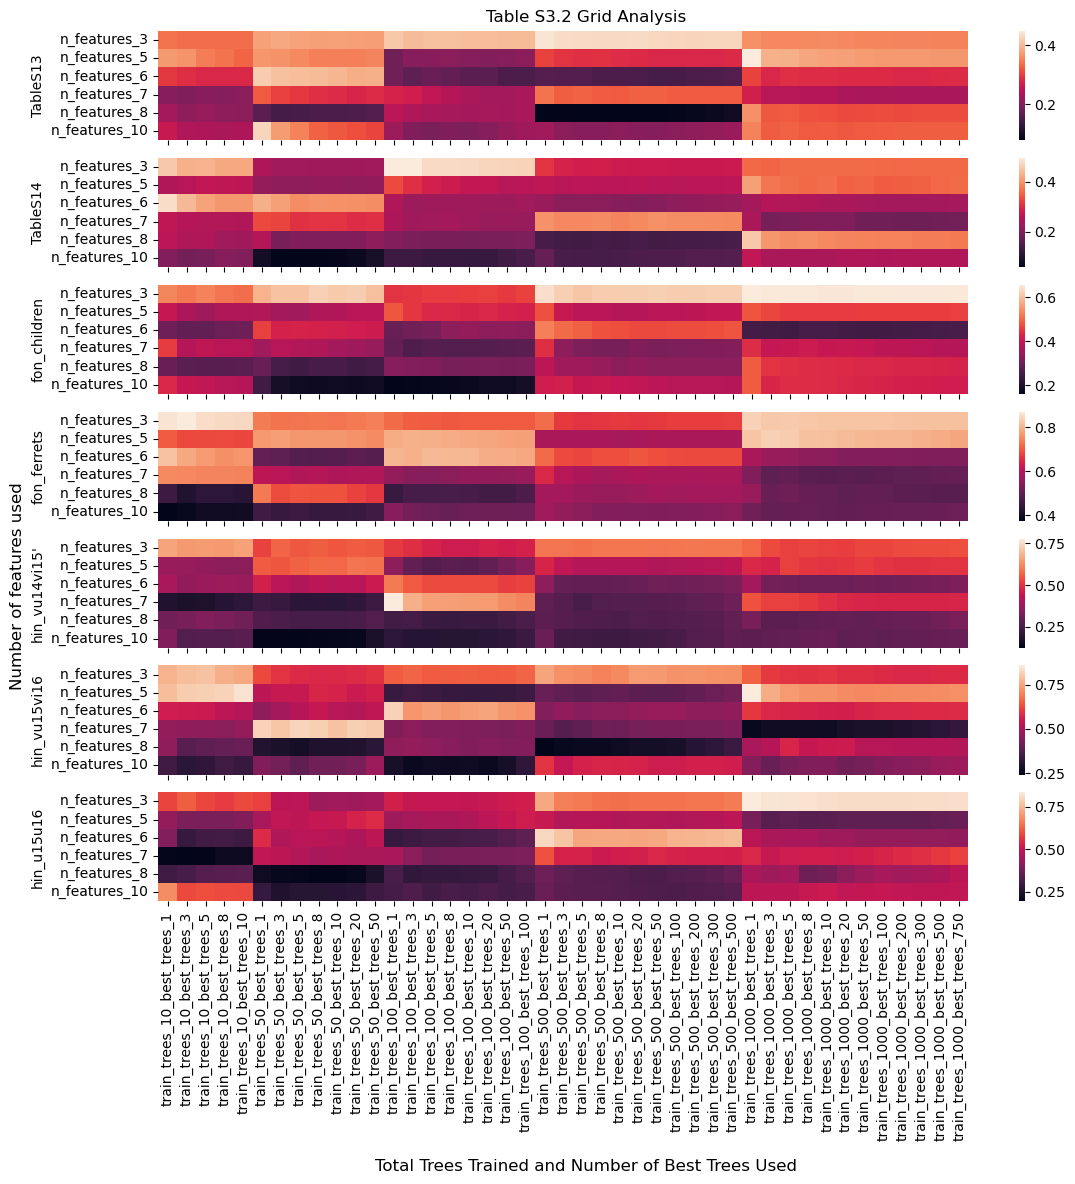

In [184]:
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(12,12))

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.2_to_TableS13'], ax=axs[0])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.2_to_TableS14'], ax=axs[1])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.2_to_fon_children'], ax=axs[2])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.2_to_fon_ferrets'], ax=axs[3])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.2_to_hin_vu14vi15'], ax=axs[4])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.2_to_hin_vu15vi16'], ax=axs[5])

sns.heatmap(grid_heatmap_per_comparison_secondary['TableS3.2_to_hin_u15u16'], ax=axs[6])

axs[0].set_xticklabels("")
axs[1].set_xticklabels("")
axs[2].set_xticklabels("")
axs[3].set_xticklabels("")
axs[4].set_xticklabels("")
axs[5].set_xticklabels("")

axs[0].set_ylabel("TableS13")
axs[1].set_ylabel("TableS14")
axs[2].set_ylabel("fon_children")
axs[3].set_ylabel("fon_ferrets")
axs[4].set_ylabel("hin_vu14vi15'")
axs[5].set_ylabel("hin_vu15vi16")
axs[6].set_ylabel("hin_u15u16")

fig.suptitle("Table S3.2 Grid Analysis")
fig.supxlabel("Total Trees Trained and Number of Best Trees Used")
fig.supylabel("Number of features used")
plt.tight_layout()
plt.show()

In [38]:
grid_heatmap_per_comparison.keys()

dict_keys(['TableS3.2_to_TableS1', 'TableS3.2_to_TableS5', 'TableS3.2_to_TableS6', 'TableS3.2_to_TableS13', 'TableS3.2_to_TableS14', 'TableS3.2_to_fon_children', 'TableS3.2_to_fon_ferrets', 'TableS3.2_to_hin_vu14vi15', 'TableS3.2_to_hin_vu15vi16', 'TableS3.2_to_hin_u15u16', 'TableS3.1_to_TableS1', 'TableS3.1_to_TableS5', 'TableS3.1_to_TableS6', 'TableS3.1_to_TableS13', 'TableS3.1_to_TableS14', 'TableS3.1_to_fon_children', 'TableS3.1_to_fon_ferrets', 'TableS3.1_to_hin_vu14vi15', 'TableS3.1_to_hin_vu15vi16', 'TableS3.1_to_hin_u15u16'])